<a href="https://colab.research.google.com/github/Natali-bali/TensorFlow_Tutorial/blob/master/01_regression_medical_costs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from keras import backend as K 
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer

In [ ]:
#Helper functions
def mse(y_test, y_pred):
  y_pred = tf.squeeze(tf.constant(y_pred))
  print(tf.metrics.mean_squared_error(y_test, y_pred))
  return tf.metrics.mean_squared_error(y_test, y_pred)
def mae(y_test, y_pred):
  y_pred = tf.squeeze(tf.constant(y_pred))
  print(tf.metrics.mean_absolute_error(y_test, y_pred))
  return tf.metrics.mean_absolute_error(y_test, y_pred)

In [ ]:
#To download data from Github open csv file in github, click raw, copy link
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.sex.unique(), df.smoker.unique(), df.region.unique()

(array(['female', 'male'], dtype=object),
 array(['yes', 'no'], dtype=object),
 array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object))

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [ ]:
#Define X and y
X = df.drop('charges', axis = 1)

In [ ]:
y = df.charges

In [ ]:
#Split to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#!!!! we dont need to reformat them to tensors! pd built on top of numpy/so changed to tensors automatically!!!
# X_train = tf.constant(X_train)
# X_test = tf.constant(X_test)
# y_train = tf.constant(y_train)
# y_test = tf.constant(y_test)

In [ ]:
results = []

In [ ]:
K.clear_session()

In [ ]:
tf.random.set_seed(42)

In [ ]:
model1 = tf.keras.Sequential([
                             tf.keras.layers.Dense(10, input_shape = [8], name='input_layer'),
                             tf.keras.layers.Dense(1, name = 'output_layer')
])

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss = 'mae', metrics = ['mae'])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                90        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.fit(X_train, y_train, epochs = 10)

Epoch 1/10
34/34 [==============================] - 0s 1ms/step - loss: 13279.4590 - mae: 13279.4590
Epoch 2/10
34/34 [==============================] - 0s 1ms/step - loss: 13006.0547 - mae: 13006.0547
Epoch 3/10
34/34 [==============================] - 0s 1ms/step - loss: 12393.1895 - mae: 12393.1895
Epoch 4/10
34/34 [==============================] - 0s 1ms/step - loss: 11334.0469 - mae: 11334.0469
Epoch 5/10
34/34 [==============================] - 0s 1ms/step - loss: 9972.4170 - mae: 9972.4170
Epoch 6/10
34/34 [==============================] - 0s 1ms/step - loss: 8676.1260 - mae: 8676.1260
Epoch 7/10
34/34 [==============================] - 0s 1ms/step - loss: 7783.6230 - mae: 7783.6230
Epoch 8/10
34/34 [==============================] - 0s 1ms/step - loss: 7467.2021 - mae: 7467.2021
Epoch 9/10
34/34 [==============================] - 0s 1ms/step - loss: 7401.5576 - mae: 7401.5576
Epoch 10/10
34/34 [==============================] - 0s 1ms/step - loss: 7380.3911 - mae: 7380.3911


In [ ]:
y_pred_1 = model1.predict(X_test)
mae1 = mae(y_test, y_pred_1)
mse1 = mse(y_test, y_pred_1)

tf.Tensor(7511.8306, shape=(), dtype=float32)
tf.Tensor(155861940.0, shape=(), dtype=float32)


In [ ]:
# Results array
results = [['Model1', mae1, mse1]]

In [ ]:
# Model2 increase number of neurons, act function RELU, epochs = 100
tf.random.set_seed(42)
model2 = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, input_shape = [8], name='input_layer', activation='relu'),
                             tf.keras.layers.Dense(1, name = 'output_layer')
])
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss = 'mae', metrics = ['mae'])

In [ ]:
model2.fit(X_train, y_train, epochs = 100, verbose = 0)

In [ ]:
y_pred_2 = model2.predict(X_test)
mae2 = mae(y_test, y_pred_2)
mse2 = mse(y_test, y_pred_2)

tf.Tensor(3437.305, shape=(), dtype=float32)
tf.Tensor(55725780.0, shape=(), dtype=float32)


In [ ]:
results.append(['Model2', mae2, mse2])

In [ ]:
#Model3 add hidden layer with 200 neurons, 300 epochs

model3 = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, input_shape = [8], name='input_layer', activation='relu'),
                             tf.keras.layers.Dense(200, name='hidden_layer', activation='relu'), 
                             tf.keras.layers.Dense(1, name = 'output_layer')
])
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss = 'mae', metrics = ['mae'])

In [ ]:
model3.fit(X_train, y_train, epochs = 300, verbose = 0)

In [ ]:
y_pred_3 = model3.predict(X_test)
mae3 = mae(y_test, y_pred_3)
mse3 = mse(y_test, y_pred_3)

tf.Tensor(1599.3115, shape=(), dtype=float32)
tf.Tensor(19797086.0, shape=(), dtype=float32)


In [ ]:
results.append(['Model3', mae3, mse3])

In [ ]:
#Model4 epochs = 500, learning rate = 0.001
tf.random.set_seed(42)
model4 = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, input_shape = [8], name='input_layer', activation='relu'),
                             tf.keras.layers.Dense(200, name='hidden_layer', activation='relu'), 
                             tf.keras.layers.Dense(1, name = 'output_layer')
])
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'mae', metrics = ['mae'])

In [ ]:
model4.fit(X_train, y_train, epochs = 500, verbose = 0)

In [ ]:
y_pred_4 = model4.predict(X_test)
mae4 = mae(y_test, y_pred_4)
mse4 = mse(y_test, y_pred_4)

tf.Tensor(2185.5847, shape=(), dtype=float32)
tf.Tensor(26286798.0, shape=(), dtype=float32)


In [ ]:
results.append(['Model4', mae4, mse4])

In [ ]:
K.clear_session()

In [ ]:
# Model5 repeat Model3 with 500 epochs
tf.random.set_seed(42)
model5 = tf.keras.Sequential([
                             tf.keras.layers.Dense(300, input_shape = [8], name='input_layer', activation='relu'),
                             tf.keras.layers.Dense(50, name='hidden_layer', activation='relu'), 
                             tf.keras.layers.Dense(1, name = 'output_layer')
])
model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss = 'mae', metrics = ['mae'])

In [ ]:
history5 = model5.fit(X_train, y_train, epochs = 500, verbose = 0)

In [ ]:
y_pred_5 = model5.predict(X_test)
mae5 = mae(y_test, y_pred_5)
mse5 = mse(y_test, y_pred_5)

tf.Tensor(1473.6271, shape=(), dtype=float32)
tf.Tensor(19288702.0, shape=(), dtype=float32)


In [ ]:
results.append(['Model5_3', mae5, mse5])

In [ ]:
results

[['Model1',
  <tf.Tensor: shape=(), dtype=float32, numpy=7511.8306>,
  <tf.Tensor: shape=(), dtype=float32, numpy=155861940.0>],
 ['Model2',
  <tf.Tensor: shape=(), dtype=float32, numpy=3437.305>,
  <tf.Tensor: shape=(), dtype=float32, numpy=55725780.0>],
 ['Model3',
  <tf.Tensor: shape=(), dtype=float32, numpy=1599.3115>,
  <tf.Tensor: shape=(), dtype=float32, numpy=19797086.0>],
 ['Model4',
  <tf.Tensor: shape=(), dtype=float32, numpy=2185.5847>,
  <tf.Tensor: shape=(), dtype=float32, numpy=26286798.0>],
 ['Model5_2',
  <tf.Tensor: shape=(), dtype=float32, numpy=1498.7117>,
  <tf.Tensor: shape=(), dtype=float32, numpy=19043574.0>],
 ['Model5',
  <tf.Tensor: shape=(), dtype=float32, numpy=1889.2441>,
  <tf.Tensor: shape=(), dtype=float32, numpy=21847268.0>],
 ['Model5_3',
  <tf.Tensor: shape=(), dtype=float32, numpy=1473.6271>,
  <tf.Tensor: shape=(), dtype=float32, numpy=19288702.0>],
 ['Model5_3',
  <tf.Tensor: shape=(), dtype=float32, numpy=1473.6271>,
  <tf.Tensor: shape=(), dtype

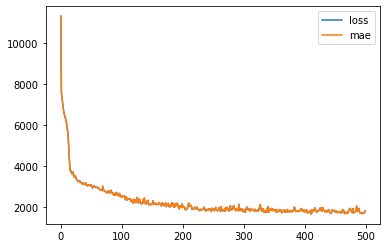

In [ ]:
#Plot history (loss function)
pd.DataFrame(history5.history).plot()

### Preprocessing Data, Normalization and Standartisation

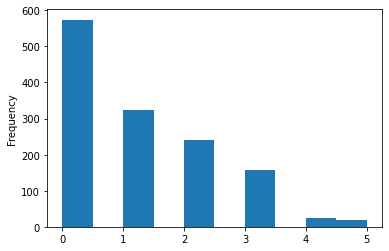

In [ ]:
df.children.plot(kind = 'hist')

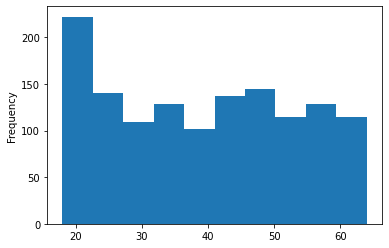

In [ ]:
df.age.plot(kind = 'hist')

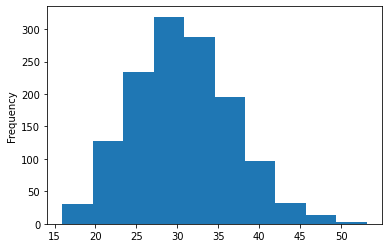

In [ ]:
df.bmi.plot(kind = 'hist')

In [ ]:
"""We need to scale(normalize) data 
MinMaxScaler used as default for neural networks
Neural Networks prefer normalisation
Standard Scaler transform data to normal distribution"""

In [ ]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
ct = make_column_transformer((MinMaxScaler(), ['age', 'bmi', 'children']),
                             remainder='passthrough')

In [ ]:
X_train_ = ct.fit_transform(X_train)

In [ ]:
X_train_

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
X_train_.shape

(1070, 8)

In [ ]:
X_test_ = ct.transform(X_test)

In [ ]:
K.clear_session()

In [ ]:
# Model6 repeat Model5 with normalized data
tf.random.set_seed(42)
model6 = tf.keras.Sequential([
                             tf.keras.layers.Dense(8, input_shape = [8], name='input_layer', activation='relu'),
                             tf.keras.layers.Dense(300, name='hidden_layer', activation='relu'), 
                             tf.keras.layers.Dense(1, name = 'output_layer')
])
model6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05), loss = 'mae', metrics = ['mae'])

In [ ]:
history6 = model6.fit(X_train_, y_train, epochs = 500, verbose = 0)

In [ ]:
y_pred_6 = model6.predict(X_test_)
mae6 = mae(y_test, y_pred_6)
mse6 = mse(y_test, y_pred_6)

tf.Tensor(1369.126, shape=(), dtype=float32)
tf.Tensor(19233040.0, shape=(), dtype=float32)


In [ ]:
results.append(['Model6', mae6, mse6])

In [ ]:
results

[['Model1',
  <tf.Tensor: shape=(), dtype=float32, numpy=7511.8306>,
  <tf.Tensor: shape=(), dtype=float32, numpy=155861940.0>],
 ['Model2',
  <tf.Tensor: shape=(), dtype=float32, numpy=3437.305>,
  <tf.Tensor: shape=(), dtype=float32, numpy=55725780.0>],
 ['Model3',
  <tf.Tensor: shape=(), dtype=float32, numpy=1599.3115>,
  <tf.Tensor: shape=(), dtype=float32, numpy=19797086.0>],
 ['Model4',
  <tf.Tensor: shape=(), dtype=float32, numpy=2185.5847>,
  <tf.Tensor: shape=(), dtype=float32, numpy=26286798.0>],
 ['Model5_2',
  <tf.Tensor: shape=(), dtype=float32, numpy=1498.7117>,
  <tf.Tensor: shape=(), dtype=float32, numpy=19043574.0>],
 ['Model5',
  <tf.Tensor: shape=(), dtype=float32, numpy=1889.2441>,
  <tf.Tensor: shape=(), dtype=float32, numpy=21847268.0>],
 ['Model5_3',
  <tf.Tensor: shape=(), dtype=float32, numpy=1473.6271>,
  <tf.Tensor: shape=(), dtype=float32, numpy=19288702.0>],
 ['Model5_3',
  <tf.Tensor: shape=(), dtype=float32, numpy=1473.6271>,
  <tf.Tensor: shape=(), dtype

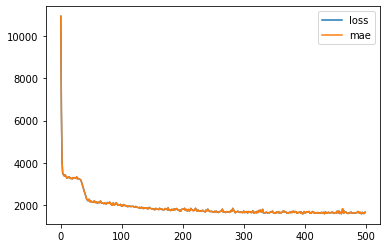

In [ ]:
pd.DataFrame(history6.history).plot()